stepik 2.3

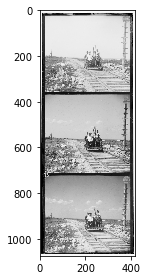

In [1]:
%matplotlib inline
from skimage.io import imread, imsave, imshow
from numpy import clip
from skimage import img_as_float, img_as_ubyte, color
from numpy import roll, dstack

img = imread("00.png")
imshow(img)

In [2]:
h = img.shape[0]
w = img.shape[1]
h//3

358

In [3]:
percent = 0.1
h = h//3

In [4]:
img1 = img[0:h, 0:w]
img2 = img[h:h*2, 0:w]
img3 = img[h*2:h*3, 0:w]

In [5]:
print(img1.shape, img2.shape, img3.shape)

(358, 419) (358, 419) (358, 419)


In [6]:
percent_h = int(h * 0.1)
percent_w = int(w * 0.1)
#b
B = img1[percent_h: (h - percent_h), percent_w: w - percent_w]
#g
G = img2[percent_h: (h - percent_h), percent_w: w - percent_w]
#r
R = img3[percent_h: (h - percent_h), percent_w: w - percent_w]

print(B.shape, G.shape, R.shape)

(288, 337) (288, 337) (288, 337)


In [9]:
# Проверка корректности обрезания рамок

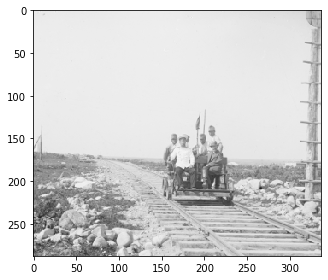

In [8]:
imshow(B)

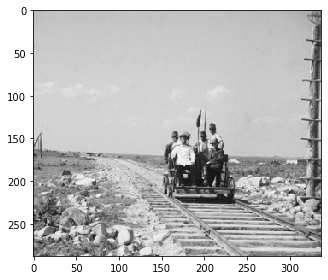

In [20]:
imshow(G)

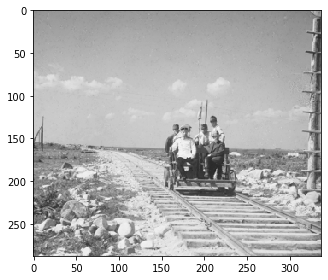

In [21]:
imshow(R)

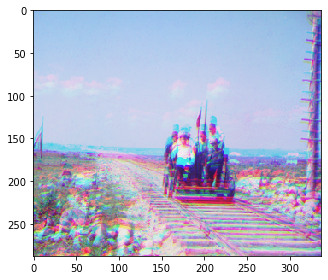

In [22]:
imshow(dstack((img_as_float(R),img_as_float(G), img_as_float(B))))

(9, -5) (-5, -6)
(155, 243) (857, 242)


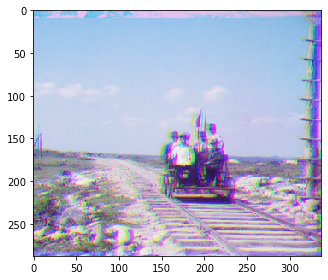

In [39]:
R_copy = R.copy()
B_copy = B.copy()
R_f = R.copy()
B_f = B.copy()
R_ij = (0,0)
B_ij = (0,0)
correl_R = (R_copy * G).sum()
correl_B= (B_copy * G).sum()

for i in range(-10, 10):
    for j in range(-10, 10):
        B_copy = B.copy()
        B_copy = roll(B_copy, i, axis = 0)
        B_copy = roll(B_copy, j, axis = 1)
        if (B_copy * G).sum() > correl_B:
            correl_B = (B_copy * G).sum()
            B_f = B_copy.copy()
            B_ij = (i,j)

            
for i in range(-10, 10):
    for j in range(-10, 10):
        R_copy = R.copy()
        R_copy = roll(R_copy, i, axis = 0)
        R_copy = roll(R_copy, j, axis = 1)
        if (R_copy * G).sum() > correl_R:
            correl_R = (R_copy * G).sum()
            R_f = R_copy.copy()
            R_ij = (i,j)


print(R_ij, B_ij)
imshow(dstack((img_as_float(R_f),img_as_float(G), img_as_float(B_f))))
row_g, col_g = (508, 237)
col_b = -B_ij[1] + col_g
row_b = -B_ij[0] + row_g-(h)
row_r = -R_ij[0] + row_g+(h)
col_r = -R_ij[1] + col_g
print((row_b, col_b), (row_r, col_r))

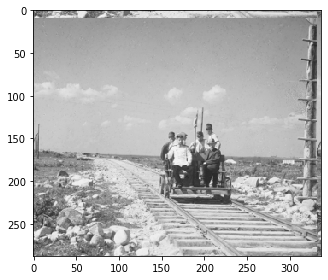

In [40]:
imshow(R_f)

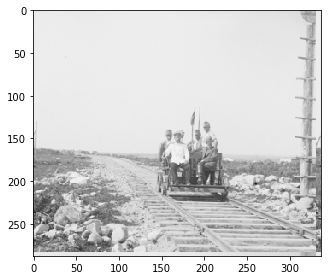

In [41]:
imshow(B_f)

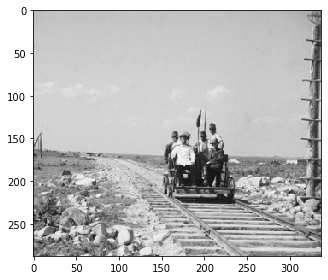

In [42]:
imshow(G)

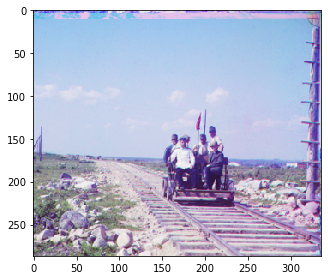

In [139]:
imshow(dstack((img_as_float(img3_n), img_as_float(img2_n), img_as_float(img1))))